# **The PLAsTiCC Astronomy "Starter Kit"**
### -Gautham Narayan, <gnarayan@stsci.edu>, 20180802
**Borrowing heavily from notebooks used for the LSST Data Science Fellowship Program and the NOAO Big Data Academy/Teen Science Cafe**
***

This notebook provides an introduction to some of the astrophysicss that might be relevant for the "Photometric LSST Astronomical Time-series Classification Challenge" (PLAsTiCC) on Kaggle. It's intended to provide some domain knowledge to data scientists taking part in the challenge, and may even prove useful to some of the astronomers competing. 

While there's no practical way to cover all of the background astrophysics in a single Jupyter notebook, though a lot of it may not be relevant to tackle the challenge. It is interesting stuff, and if you are curious and want do know more about something, or how to do something that isn't covered here then just ask! You'll find us on the Kaggle forum for this challenge! 

***
## 1. LSST, PLAsTiCC and you

### 1a. The Large Synoptic Survey Telescope

PLAsTiCC is intended to simulate time-series observations of sources in the night-sky as seen during the first three years of operation of the <a href="http://www.lsst.org">Large Synoptic Survey Telescope (LSST)</a>. The LSST (illustrated below) is a 8.4 meter telescope being built high up in Atacama desert of Chile, on a mountain called Cerro Pachon.

<img src="media/LSST_night.jpg">

Credit: LSST Corporation


It's going to have a 3.2 gigapixel camera that's about the size of an adult human to take images of the night sky. Those numbers may not seem all that meaningful without a reference, so here is the LSST field-of-view compared against the full moon and a similar class telescope:

<img src="media/LSST_FoV.jpg">
Credit: Zelko Ivezic, LSST

This is what makes LSST so revolutionary. If you like photography, it has a 6.5 *meter* effective aperture and a focal ratio (f-number) of f/1.23. This means that it can take make a map of the entire southern sky, resolving details that are smaller than the width of a human hair held at arm's length... every 4 nights. That's a data rate of 20 terabytes, or about 1 US Library of Congress every night. It is, for want of a better word, ginormous.

### 1b. Light Curves

Scanning the entire sky repeatedly means we can identify astrophysical sources in the night sky that change in brightness over time, and we can create *time-series* of these change in brightness. We call these time-series, "light curves." Here's an illustration of one of these source - supernova 1998bu, imaged with the Hubble Space Telescope. The left panel shows you how the supernova event looked, while the right panel shows a plot of the brightness of the supernova, measured using a process called "photometry," used to determine the light curve.

In [1]:
%%HTML
<div align="middle">
<video width="90%" controls>
      <source src="media/SN98bu_LC.mp4" type="video/mp4">
</video>
</div>

Credit: Peter Challis, Harvard/CfA

LSST presents us with a great oppotunity here because it will find an order of magnitude (or more) of these kinds of events than astronomers have ever observed. The same event rate also presents a new challenge - supernovae aren't the only sorts of variable and transient events in the night sky. Here's an (incomplete!) tree diagram of the various kinds of variable sources in the night sky:

<img width="90%" src="media/variability_tree.jpg">

Some sources are intrinsically variable, while others are extrinsic - they vary, not because they the source itself has some fundamental physical property that causes them to vary, but rather because of extra attributes - e.g. rotation, or forming part of a binary system that just happens to eclipse along our line of sight from Earth. Some sources vary periodically, while others show random or stochastic behavior. Yet others, like supernovae, typically explode the once and fade away. The named sources in the training set include:

- Secular, Pulsating and Eruptive Variable Stars
- Tidal Disruption Events
- Kilonovae
- Supernovae of different types
- Active Galactic Nucleii 
- Microlensing Events
- Eclipsing Binaries

We're being deliberately vague about exactly what sub-types you'll find in the data, and even what class number in the data corresponds to what astrophysical class, but we'll give you a few external resources for these events at the bottom of this notebook, if you are determined to augment the training set where possible - there's been exactly one kilonova event ever seen (this will hopefully be out of date by the time the challenge is over though), so it's not really possible to provide multiple examples!

To determine the class of any particular astrophysical source, we currently need lots of observational data. At present, we classify the sources not using just their light curves, but using more detailed follow-up with other telescopes. However there aren't enough telescopes in the world _combined_ to keep up with the LSST event rate. Consequently, we've got to invent new techniques to classify light curves.

**This is where PLAsTiCC and you come in.**

### 1c. The PLAsTiCC Challenge

PLAsTiCC simulates the light curves that LSST can expect to collect (it doesn't exist yet, so we can't give you real LSST data!). These are complete with realistic time-sampling and noise properties, as well as realistic astrophysical effects for a variety of the sources in the variability tree. These sources, even closely related classes, can have light curves that look quite different from each other. Different rise and fall times, different absolute energies, a different structure of bumps and wiggles. 

<img src="media/smartt_supernovae_diversity.jpg">

Credit: Stephen J. Smartt, Queen's University, Belfast, https://www.nature.com/articles/nature11643


And these can look radically different from the leight curves of periodic variables. Take for instance the eclipsing binary system <a href="http://simbad.u-strasbg.fr/simbad/sim-id?protocol=html&Ident=Y+Psc&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id">Y Piscium</a>. This is an eclipsing binary system (a name which the animation below should help explain) with a light curve that looks like this:

<img src="media/Y_Psc_Animated_LC.gif">

Credit: AstroLab, Durham University, https://community.dur.ac.uk/physics.astrolab/eclipsing.html

Now, the exact details of each eclipsing binary system determine the properties of the light curve - how bright each star is, their relative sizes, how fast they orbit each other - but all of these have the same general light curve shape. And of course, depending on the period, the time scale of the variability can be anything from hours to years!

Other variable stars have very different light curve shapes from eclipsing binaries. Indeed, variable stars were the first example of astronomers using light curve shapes for classification. Here's a hand-drawn illustration of some of the different known types of variable stars from <a href="https://archive.org/details/popularsciencemo69newy">Popular Science Monthly in 1906</a> (page 179).

<img src="media/atlas_of_variable_stars.png">
THe variables here (from left to right, top to bottom) are a Mira, an eclipsing binary and "RR Lyrae" of type AB and an RR Lyrae of type C. Eclipsing binaries are still called Algol-type stars some times, but note that they look really different from the bottom two panels, and if you look at the x-axis on the horizontal panel, you'll notice that the characteristic time-scale there is much different from the rest of them!

And you have more information than just the one time-series. If you watched that video of the supernova video carefully, you'll have noticed that there's actually two traces of the brightness - one that covers the optical, and one that covers the infrared. This is because our telescope detectors are sensitive to wavelengths of light well beyond the range our eyes can see. We use optical filters - elements that only permit a certain range of wavelengths to pass through - to measure the brightness in different "passbands." Here's the filter exchanger for the LSST camera (adult human for scale).

In [2]:
%%HTML
<div align="middle">
<video width="90%" controls>
      <source src="media/LSST_filter_change.mp4" type="video/mp4">
</video>
</div>

Credit: LSST Corporation

How much light gets through each filter depends not only on the properties of the filter, but really the transmission of everything between the camera and the source - the atmosphere, dust in our galaxy, dust in the galaxy of the source... We refer to the total transmission of each filter as the "passband" (and often use the terms interchangably). 

Each object has observations in every passband (though there may not be significant signal in some passbands - that is also information though). The passbands that LSST will use are called *u*, *g*, *r*, *i*, *z*, and *Y*. In other words, each object has six time-series you can use for classification:

<img src="media/LSST_passbands.jpg">

The training sample is what the entire astronomical community can expect can have before LSST turns on, except where we have a mismash of observations from different telescopes (something you'll have to deal with if you decide and try to augment it from the literature), you get a nice homogenous data set. The test set is a scaled down version what we expect to have after 3 years of LSST operations. Even scaled down, it's much, much bigger than the training set. You'll have to design your algorithm with speed as a consideration. Also, it's not perfectly representative - we can usually only classify the brightest objects we find with conventional methods, whereas you don't get that luxury! You can expect kinds of sources in the test set that aren't even in the training set - we expect to find new classes of objects with LSST that we've never seen before, but we've simulated light curves based on theoretical predictions of how they ought to look!

**Your mission, should you choose to accept it, is to classify the things that go bump in the night.**

You can win prizes, eternal glory, and the satisfaction of knowing that you made a real and impactful contribution to the biggest astrophysical experiment to ever be attempted!

There's not much time too - LSST is coming up fast. Here's a construction picture from August 2018, and it is looking a lot like the render at the top of this page! 

<img width="90%" src="media/LSST_construction.jpg" >

Credit: Gianluca Lombardi

***

## 2. A Primer on the Dataset - Light Curves:

We've included some example data along with this notebook to illustrate some of the astrophysical effects you'll encounter in the full data set. This example data is simpler than the real data - it has only four of the six passbands, and different properties from the full sample, so that the signal is less swamped by noise, and only a few classes. This will make it easier to work with and highlight some of the issues you'll encounter will the full dataset.

We'll begin by define a class to handle this example, with a few illustrative features you can use for classification:

In [3]:
import os
import numpy as np
import scipy.stats as spstat
from astropy.table import Table
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib notebook

In [4]:
class LightCurve(object):
    '''Light curve object for NOAO formatted data'''
    
    def __init__(self, filename):
        '''Read in light curve data'''
        self._passbands = OrderedDict([('g','C2'), ('r', 'C3'), ('i','C1'), ('z','k')])
        self.DFlc = Table.read(filename, format='ascii')
        self.header   = dict([x.split(':') for x in self.DFlc.meta['comments']])
        self.zgal     = float(self.header['zgal'])
        self.zgalerr  = float(self.header['zgalerr'])
        self.filename = os.path.basename(filename).replace('.dat', '')
        self._finalize()
       
    def _finalize(self):
        '''Store individual passband fluxes as object attributes'''
        # in this example, we'll use the weighted mean to normalize the features
        weighted_mean = lambda flux, dflux: np.sum(flux*(flux/dflux)**2)/np.sum((flux/dflux)**2)
        
        # define some functions to compute simple descriptive statistics
        normalized_flux_std = lambda flux, wMeanFlux: np.std(flux/wMeanFlux, ddof = 1)
        normalized_amplitude = lambda flux, wMeanFlux: (np.max(flux) - np.min(flux))/wMeanFlux
        normalized_MAD = lambda flux, wMeanFlux: np.median(np.abs((flux - np.median(flux))/wMeanFlux))
        beyond_1std = lambda flux, wMeanFlux: sum(np.abs(flux - wMeanFlux) > np.std(flux, ddof = 1))/len(flux)
        
        for pb in self._passbands:
            ind = self.DFlc['pb'] == pb
            
            f  = self.DFlc['flux'][ind]
            df = self.DFlc['dflux'][ind]
            m  = weighted_mean(f, df)
            
            # we'll save the measurements in each passband to simplify access.
            setattr(self, f'{pb}Flux', f)
            setattr(self, f'{pb}FluxUnc', df)
            setattr(self, f'{pb}Mean', m)
            
            # compute the features
            std = normalized_flux_std(f, df)
            amp = normalized_amplitude(f, m)
            mad = normalized_MAD(f, m)
            beyond = beyond_1std(f, m)
            skew = spstat.skew(f) 
            
            # and save the features
            setattr(self, f'{pb}Std', std)
            setattr(self, f'{pb}Amp', amp)
            setattr(self, f'{pb}MAD', mad)
            setattr(self, f'{pb}Beyond', beyond)
            setattr(self, f'{pb}Skew', skew)
        
        # we can also construct features between passbands
        pbs = list(self._passbands.keys())
        for i, lpb in enumerate(pbs[0:-1]):
            rpb = pbs[i+1]
            colname = '{}Minus{}'.format(lpb, rpb.upper())
            lMean = getattr(self, f'{lpb}Mean')
            rMean = getattr(self, f'{rpb}Mean')
            col = -2.5*np.log10(lMean/rMean) if lMean> 0 and rMean > 0 else -999
            setattr(self, colname, col)
                                    
    def plot_multicolor_lc(self, phase=None):
        '''Plot the 4 band light curve'''
        fig, ax = plt.subplots(figsize=(8,6))
        if phase is None:
            phase = []
        if len(phase) != len(self.DFlc):
            phase = self.DFlc['t']
            xlabel = 'MJD'
        else:
            xlabel = 'Phase'
            
        for i, pb in enumerate(self._passbands):
            ind = self.DFlc['pb'] == pb
            ax.errorbar(phase[ind], 
                     self.DFlc['flux'][ind],
                     self.DFlc['dflux'][ind],
                     fmt = 'o', color = self._passbands[pb], label = f'{pb}')
        ax.legend(ncol = 4, frameon = True)
        ax.set_xlabel(f'{xlabel}', fontsize='large')
        ax.set_ylabel('Flux', fontsize='large')
        fig.suptitle(self.filename, fontsize='x-large')
        fig.tight_layout(rect=[0, 0, 1, 0.97])
        
    def get_features(self):
        '''Return all the features for this object'''
        variables = ['Std', 'Amp', 'MAD', 'Beyond', 'Skew']
        feats = []
        for i, pb in enumerate(self._passbands):
            feats += [getattr(self, f'{pb}{x}') for x in variables]
        return feats

Some of the light curves in the training set should already look familiar - this is a type Ia supernova - like SN1998bu in the animation. You might look at something like this light curve, and try to estimate something like a full-width at half maximum to determine a time-scale. That wouldn't be a bad idea for type Ia supernovae, but of course not everything in the dataset is a supernova

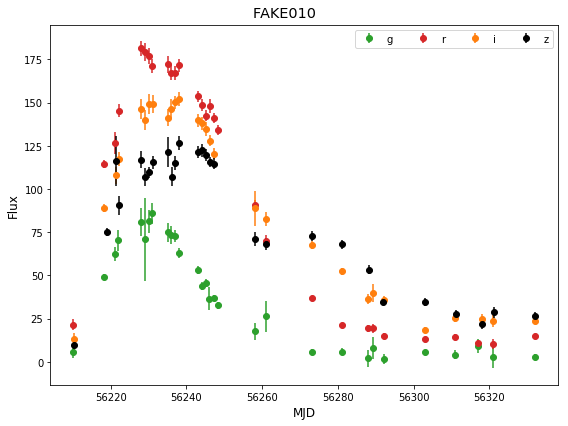

In [5]:
lc = LightCurve('data/plasticc_starter_kit_training_set/FAKE010.dat')
lc.plot_multicolor_lc()

This object for instance is something very different - it's a variable star. It's got a characteristic time scale, but you wouldn't know it from a simple light curve plot.

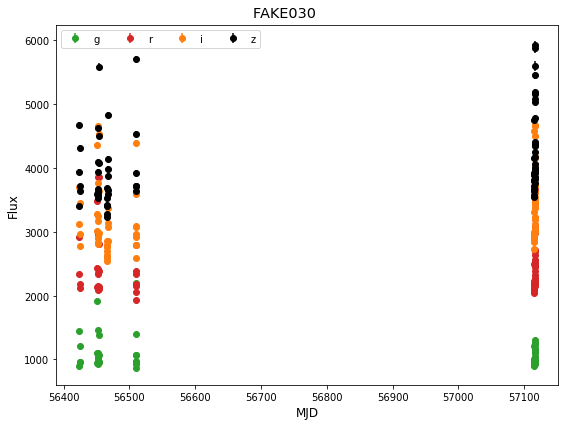

In [6]:
lc = LightCurve('data/plasticc_starter_kit_training_set/FAKE030.dat')
lc.plot_multicolor_lc()

We can use a Fourier technique known as the Lomb-Scargle Periodogram to estimate the characeteristic scale, at least given some search range.

In [7]:
from gatspy.periodic import LombScargleMultiband

In [12]:
model = LombScargleMultiband(fit_period=True)

# we'll window the search range by setting minimums and maximums here
# but in general, the search range you want to evaluate will depend on the data
# and you will not be able to window like this unless you know something about
# the class of the object a priori
t_min = max(np.median(np.diff(sorted(lc.DFlc['t']))), 0.1)
t_max = min(10., (lc.DFlc['t'].max() - lc.DFlc['t'].min())/2.)

model.optimizer.set(period_range=(t_min, t_max), first_pass_coverage=5)
model.fit(lc.DFlc['t'], lc.DFlc['flux'], dy=lc.DFlc['dflux'], filts=lc.DFlc['pb'])
period = model.best_period
print(f'{lc.filename} has a period of {period} days')

Finding optimal frequency:
 - Estimated peak width = 0.00906
 - Using 5 steps per peak; omega_step = 0.00181
 - User-specified period range:  0.1 to 10
 - Computing periods at 34317 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
FAKE030 has a period of 0.43305791539072674 days


Takes a while eh... you could narrow the search range a bit, if you knew something about the astrophysical class of the object of interest... which is what you want to determine.

Still it's a fairly reliable way to extract a period from an irregularly sampled recurring time-series. Folding the observations to this period takes that noisy time-series and shows you some of the structure in the data. If you look at the light curve below and compare it to the hand drawn diagram of variable stars from 1906, bearing in mind that it's period is a bit less than 12 hours, you should be able to classify it pretty easily,

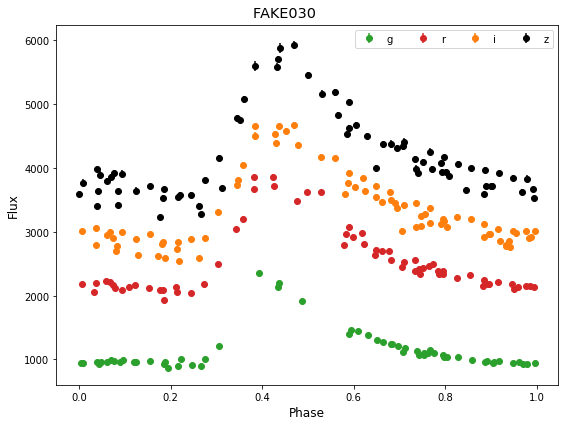

In [13]:
phase = (lc.DFlc['t'] / period) % 1
lc.plot_multicolor_lc(phase=phase)

This folded curve is suitable for feature extraction, but we don't a priori know what objects have periodic structure and which ones don't. Also, some classes of objects exhibit stochastic variability - they don't repeat periodically, but they do change more on some time scales than others. Active galactic nucleii - massive black holes surrounded by hot dust and gas at the centers of galaxies - exhibit this kind of behavior.

Still, you might look at the light curve above, and conclude that extracting information about shape and the relative strengths of the signal in different passbands is a promising way to encode the information on each object, and would be useful for classification. And you'd be right! But there's another astrophysical effect that affects the determination of time scales and colors, and this one has nothing to do with the nature of the object - what it is - but rather, *where* it is.

## 3. Primer cont'd: Contextual Information Provided in PLAsTiCC

Real astrophysical data is from sources on the sky, which means that we normally have contextual information in addition to the light curve to help with classification - if a source is near a galaxy or if it is isolated for instance. 

With PLAsTiCC, since we're simulating the time series, we don't have the full breadth of this contextual information. We can't really simulate it from previous surveys, because none of them achieve the same sort of signal-to-noise that LSST will - one of the big motivations for building LSST in the first place.   

While we can't give you all the contextual information, we do provide a few essential elements that you _may_ want to use to augment the features extracted directly from the light curves (this has plusses and minuses). 

At the minimum, there's the position in our three spatial dimensions. We use a spherical coordinate system on the sky, with the positions of stars indexed by a two-tuple that describes where they were on the 1st of January in the year 2000 (just a convenient reference, since with respect to the Earth, orbits stars move relative to a fixed background, and orbits precess and what not). These two angles are called the "Right Ascension" (R.A.) and the "Declination" (often just dec.) corresponding to longitude and latitutde on the Earth. Wiki has a good illustration of this coordinate system:

<img src="media/Celestial_Coordinates.gif">

Credit: https://en.wikipedia.org/wiki/Right_ascension

If we unroll the sky into a flat Aitoff projection, we can get a view of the entire sky. Lines of constant Right Ascension and Declination are in grey, while the green lines indicate a coordinate transform, where the plane of the galaxy defines the equatorial plane, instead of the Earth's equator - a galactic coordinate system.

<img src="media/allsky_equatorial.jpg">

Splitting the sky into two hemispheres by extending the Earth's equator outwards, the Milky Way forms a graceful arc. LSST, based on Chile, views the southern sky. Comparing how the galaxy looks in this projection should help make sense of the otherwise weird looking pattern of observations that LSST plans to obtain:

<img src="media/skymap_minion1016.jpg">

Credit: LSST Corporation

PLAsTiCC simulates the "Wide-Fast-Deep" Survey - the main LSST program, and the "Deep Drilling Fields" - a few small regions where LSST will get more observations more often than in the wide-fast deep survey for specialized scientific studies.

RA and Dec are only two numbers though - we live in a Universe with (at least) 3 spatial dimensions. The third number we use to locate objects in 3D space isn't even a distance from the origin - it's a velocity! We call it the "redshift."

<img src="media/redshift.jpg">

Redshift is so named because if you take the light from distance astrophysical sources and pass it through a prism, you see the same atomic fingerprint of elements and molecules you find here on Earth... just shifted. If the source is moving towards us, things are shifted to the blue (or higher frequencies), while if the source is moving away from us, things are shifted to the red (or lower frequencies). This isn't all that different from the Doppler shift of the sound of an ambulance or police siren moving across you - it'll increase in frequency as the vehicle approaches you, and decrease in frequency as it moves away. You can convert the change in frequency or wavelength into a speed using:

$$z = \frac{\Delta \lambda}{\lambda} \approx - \frac{\Delta \nu}{\nu}  \sim \frac{v}{c}$$

where $z$ is the redshift, $\nu$ is the original frequency, and $\Delta \nu$ is the change in frequency, $v$ is the recession velocity and $c$ is the speed of light.

Now this might make you wonder if things can appear to be moving faster than the speed of light, and indeed we routinely see this. This is how the cosmological redshift differs from the Doppler effect. It's not the physical motion of the sources that is causing the change in frequency, but rather that the space between us and the source is stretching. If fact, if we color the galaxies in the nearby Universe that we can see from Earth by redshift with a small telescope, it'll look as though almost everything is moving away from us - the Universe is expanding.


<img src="media/large_scale_structure.jpg">

Credit: Tom Jarrett, IPAC/Caltech

If everything seems to be moving away from us, you might be prompted to wonder if we're the center of the expansion of the Universe. We aren't. We could move to any other point in the Universe and we'd see the same behavior. This is a counterintuitive consequence of Einstein's General Theory of Relativity, and living in a Universe that is homogenous and isotropic. If you find this stuff fascinating, you might want to read <a href="https://www.forbes.com/sites/startswithabang/2018/04/17/the-most-important-equation-in-the-universe/#8869ba60da5c">this.</a>